<a href="https://colab.research.google.com/github/NgWJ422/handwritten_digit_recognition/blob/main/handwritten_digit_recognistion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np              # NumPy for numerical operations
import matplotlib.pyplot as plt # Matplotlib for plotting
import tensorflow as tf         # TensorFlow for machine learning tasks
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Load the MNIST dataset from TensorFlow's datasets
mnist = tf.keras.datasets.mnist

In [ ]:
# Split the dataset into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Print the shapes of training and testing data arrays
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


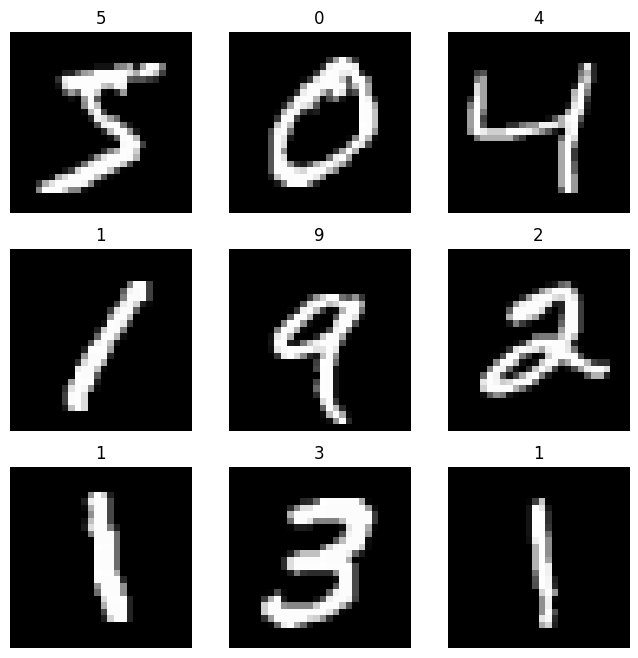

In [ ]:
# Visualize the first 9 training samples using Matplotlib
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')  # Display grayscale images
    plt.title(y_train[i])
    plt.axis('off')

In [ ]:
# Normalize pixel values in the training and testing sets
x_train = tf.keras.utils.normalize(x_train, axis=0)
x_test = tf.keras.utils.normalize(x_test, axis=0)

Building models

In [ ]:
# Building the neural network model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  # Flatten the 28x28 images into a 1D array
model.add(tf.keras.layers.Dense(128, activation='relu'))  # Dense layer with 128 neurons and ReLU activation
model.add(tf.keras.layers.Dense(64, activation='relu'))   # Dense layer with 64 neurons and ReLU activation
model.add(tf.keras.layers.Dense(32, activation='relu'))   # Dense layer with 32 neurons and ReLU activation
model.add(tf.keras.layers.Dense(10, activation='softmax'))  # Output layer with 10 neurons for digit classification

In [ ]:
# Display the summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model with specified optimizer, loss function, and metrics
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 11s 5ms/step - loss: 0.6126 - accuracy: 0.8203 - val_loss: 0.5101 - val_accuracy: 0.8892
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2822 - accuracy: 0.9177 - val_loss: 0.3578 - val_accuracy: 0.9242
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1968 - accuracy: 0.9423 - val_loss: 0.2511 - val_accuracy: 0.9460
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1510 - accuracy: 0.9555 - val_loss: 0.2131 - val_accuracy: 0.9546
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1225 - accuracy: 0.9625 - val_loss: 0.2050 - val_accuracy: 0.9589
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1019 - accuracy: 0.9692 - val_loss: 0.1964 - val_accuracy: 0.9609
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0869 - accuracy: 0.9733 - val_loss: 0.2165 - val_accuracy: 0.9550

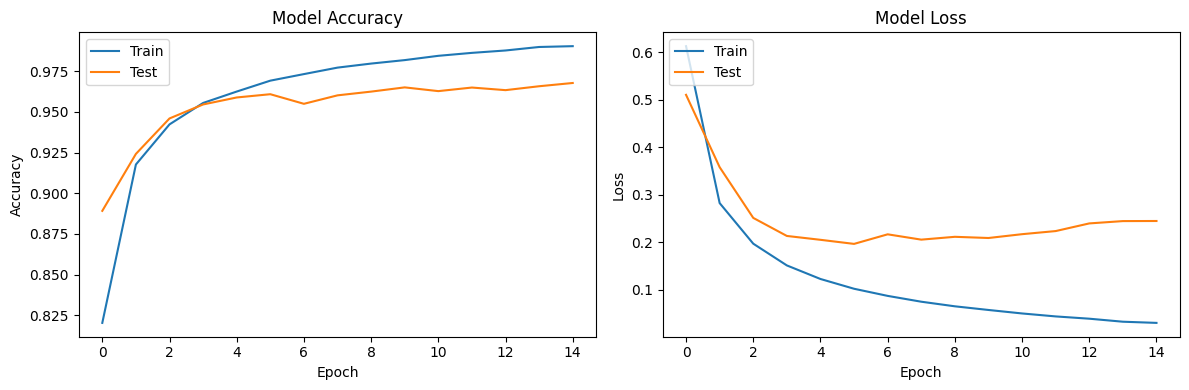

In [ ]:
# Train the model and capture the training history
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=15)

# Set up a Matplotlib figure with two subplots for accuracy and loss visualization
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])        # Plot training accuracy values over epochs
plt.plot(history.history['val_accuracy'])    # Plot validation accuracy values over epochs
plt.title('Model Accuracy')                   # Set title for accuracy subplot
plt.xlabel('Epoch')                           # Set label for x-axis
plt.ylabel('Accuracy')                        # Set label for y-axis
plt.legend(['Train', 'Test'], loc='upper left')  # Display legend in the upper left corner

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])            # Plot training loss values over epochs
plt.plot(history.history['val_loss'])        # Plot validation loss values over epochs
plt.title('Model Loss')                       # Set title for loss subplot
plt.xlabel('Epoch')                           # Set label for x-axis
plt.ylabel('Loss')                            # Set label for y-axis
plt.legend(['Train', 'Test'], loc='upper left')  # Display legend in the upper left corner

# Adjust layout for better visualization
plt.tight_layout()

# Display the Matplotlib plot
plt.show()

In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=[str(i) for i in range(10)]))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.92      0.99      0.96      1010
           4       0.99      0.94      0.96       982
           5       0.97      0.96      0.97       892
           6       0.96      0.98      0.97       958
           7       0.95      0.98      0.96      1028
           8       0.97      0.93      0.95       974
           9       0.97      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



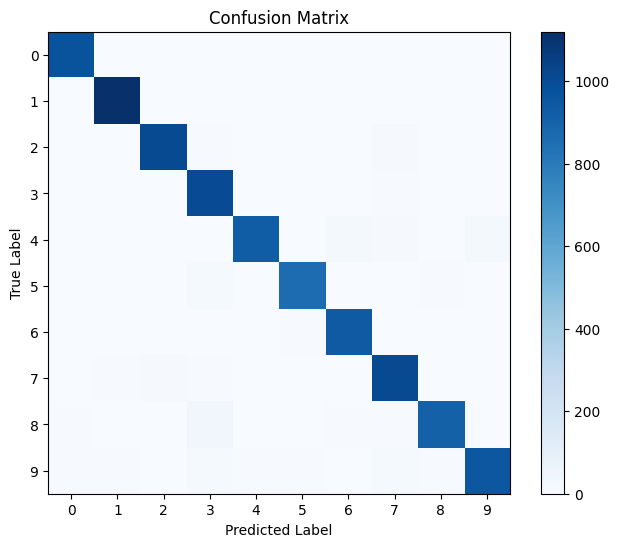

In [ ]:
# Compute confusion matrix without Seaborn
cm = confusion_matrix(y_test, y_pred_classes)

# Display the confusion matrix using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Adding labels to the confusion matrix
classes = [str(i) for i in range(10)]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
import cv2

1/1 [==============================] - 0s 43ms/step
prediction: 6


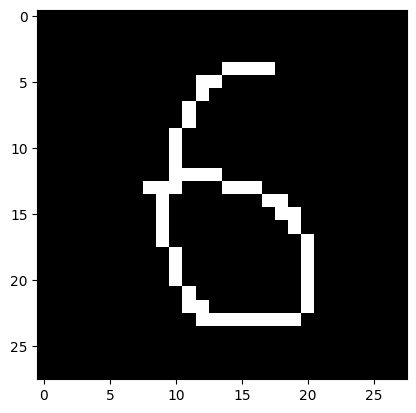

In [ ]:
# Read an external image using OpenCV, convert to grayscale, and invert pixel values
image = cv2.imread('pixil-frame-0 (2).png')[:, :, 0]
image = np.invert(np.array([image]))

# Make a prediction on the external image using the trained model
output = model.predict(image)

# Display the image and print the predicted digit
plt.imshow(image[0], cmap='gray')
print('prediction:', np.argmax(output))

In [ ]:
# Save the trained model to a file
model.save('/content/hand_written_Digit_recog_model.keras')